![Alt Text](./Images/Churn.png)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Raw_Data/Churn_Data.csv")

X = data.drop('churn', axis=1)
y = data['churn']

X_encoded = pd.get_dummies(X, columns=['state', 'international plan', 'voice mail plan'])
X_encoded = X_encoded.drop(columns=['phone number', 'area code', 'international plan_no', 'voice mail plan_no'])

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Tester = DecisionTreeClassifier()
Tester.fit(X_train, y_train)

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.5, 0.8]
}

# Create an instance of the decision tree classifier
model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(Tester, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# Print the performance metrics
print("Testing Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

report = classification_report(y_test, test_predictions)
print(report)

# Use the best model for prediction on the validation set
val_predictions = best_model.predict(X_val)

Best Parameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
Testing Set Metrics:
Accuracy: 0.936
Precision: 0.8333333333333334
Recall: 0.625
F1 Score: 0.7142857142857143
              precision    recall  f1-score   support

       False       0.95      0.98      0.96       436
        True       0.83      0.62      0.71        64

    accuracy                           0.94       500
   macro avg       0.89      0.80      0.84       500
weighted avg       0.93      0.94      0.93       500



In [3]:
# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)

# Print the performance metrics
print("Validation Set Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\n")
print('-' * 50)
print("\n")
report = classification_report(y_val, val_predictions)
print(report)

Validation Set Metrics:
Accuracy: 0.946
Precision: 0.8823529411764706
Recall: 0.759493670886076
F1 Score: 0.8163265306122449


--------------------------------------------------


              precision    recall  f1-score   support

       False       0.96      0.98      0.97       421
        True       0.88      0.76      0.82        79

    accuracy                           0.95       500
   macro avg       0.92      0.87      0.89       500
weighted avg       0.94      0.95      0.94       500



In [4]:
# Create an instance of the dummy classifier
dummy_model = DummyClassifier(strategy='most_frequent')

# Fit the dummy model on the training data
dummy_model.fit(X_train, y_train)

# Use the dummy model for prediction on the validation set
dummy_predictions = dummy_model.predict(X_val)

# Evaluate the dummy model's performance on the validation set
dummy_accuracy = accuracy_score(y_val, dummy_predictions)
dummy_precision = precision_score(y_val, dummy_predictions, zero_division=1)
dummy_recall = recall_score(y_val, dummy_predictions, zero_division=1)
dummy_f1 = f1_score(y_val, dummy_predictions, zero_division=1)

# Print the performance metrics for the dummy model
print("Dummy Model Metrics (Validation Set):")
print("Accuracy:", dummy_accuracy)
print("Precision:", dummy_precision)
print("Recall:", dummy_recall)
print("F1 Score:", dummy_f1)
print("\n")
print('-' * 50)
print("\n")
report = classification_report(y_val, dummy_predictions, zero_division=1)
print(report)

Dummy Model Metrics (Validation Set):
Accuracy: 0.842
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


--------------------------------------------------


              precision    recall  f1-score   support

       False       0.84      1.00      0.91       421
        True       1.00      0.00      0.00        79

    accuracy                           0.84       500
   macro avg       0.92      0.50      0.46       500
weighted avg       0.87      0.84      0.77       500



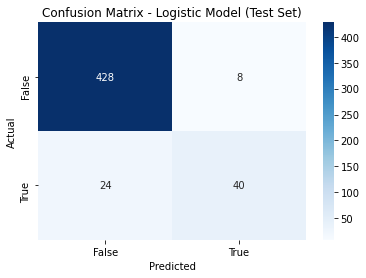

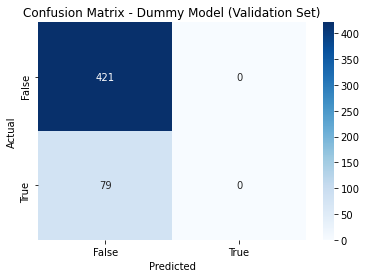

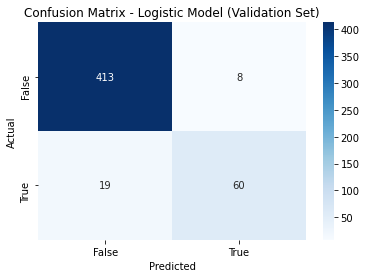

In [5]:
# Confusion matrix for logistic model on test set
logistic_cm_test = confusion_matrix(y_test, test_predictions)

# Create a figure and axis for logistic model on test set
fig, ax = plt.subplots()

# Create a heatmap using seaborn for logistic model on test set
sns.heatmap(logistic_cm_test, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks for logistic model on test set
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Logistic Model (Test Set)')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_test))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot for logistic model on test set
plt.show()

# Confusion matrix for dummy model on validation set
dummy_cm_val = confusion_matrix(y_val, dummy_predictions)

# Create a figure and axis for dummy model on validation set
fig, ax = plt.subplots()

# Create a heatmap using seaborn for dummy model on validation set
sns.heatmap(dummy_cm_val, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks for dummy model on validation set
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Dummy Model (Validation Set)')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_val))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot for dummy model on validation set
plt.show()

# Confusion matrix for logistic model on validation set
logistic_cm_val = confusion_matrix(y_val, val_predictions)

# Create a figure and axis for logistic model on validation set
fig, ax = plt.subplots()

# Create a heatmap using seaborn for logistic model on validation set
sns.heatmap(logistic_cm_val, annot=True, cmap="Blues", fmt="d", ax=ax)

# Set labels, title, and ticks for logistic model on validation set
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Logistic Model (Validation Set)')

# Set x and y axis ticks to match class labels
class_labels = sorted(set(y_val))
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the plot for logistic model on validation set
plt.show()

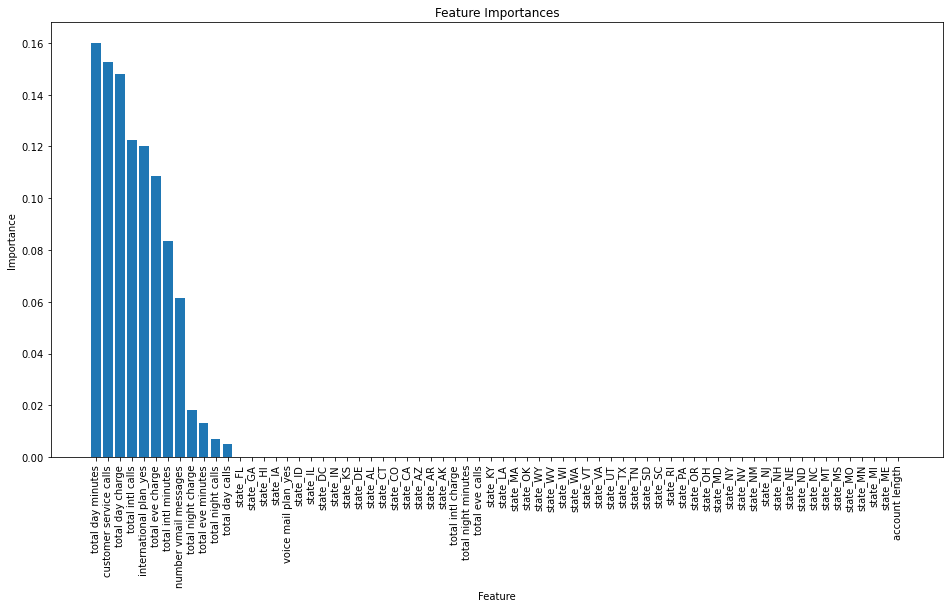

In [6]:
# Get feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create bar plot of feature importances
plt.figure(figsize=(16, 8))
plt.bar(range(X_encoded.shape[1]), importances[indices])
plt.xticks(range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [7]:
# Get feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create table of feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns[indices], 'Importance': importances[indices]})



In [8]:
# Display table
feature_importances.head(20)

,Feature,Importance
0,total day minutes,0.159924
1,customer service calls,0.152766
2,total day charge,0.147886
3,total intl calls,0.122385
4,international plan_yes,0.120211
5,total eve charge,0.108698
6,total intl minutes,0.083473
7,number vmail messages,0.061462
8,total night charge,0.018391
9,total eve minutes,0.013005


In [9]:
# Create a DataFrame with validation set data
validation_data = X_val.copy()
validation_data['churn'] = y_val
validation_data['predicted_churn'] = val_predictions

# Print the validation set with predicted churn values
validation_data

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes,churn,predicted_churn
3124,75,24,225.5,119,38.34,182.0,108,15.47,270.9,106,...,0,0,0,0,0,0,0,1,False,False
1253,85,0,197.2,97,33.52,211.7,115,17.99,210.1,133,...,0,0,0,0,0,0,1,0,False,False
862,75,38,163.6,132,27.81,146.7,113,12.47,345.8,115,...,0,0,0,0,0,0,0,1,False,False
2320,110,0,135.1,109,22.97,205.2,99,17.44,166.3,119,...,0,0,0,0,0,0,0,0,False,False
2627,86,0,150.8,85,25.64,295.9,88,25.15,247.2,104,...,0,0,0,0,0,0,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,85,0,127.9,107,21.74,271.2,124,23.05,202.2,76,...,0,0,0,0,0,0,0,0,False,False
2354,102,0,273.2,85,46.44,211.1,82,17.94,203.7,129,...,0,0,0,0,0,0,0,0,True,True
964,9,31,193.8,130,32.95,202.6,98,17.22,191.2,102,...,0,0,0,0,0,0,0,1,False,False
1061,132,31,174.5,101,29.67,245.6,105,20.88,172.8,76,...,0,0,0,0,0,0,0,1,False,False


In [10]:
validation_data.to_excel('validation_data_with_predictions.xlsx', index=False)

In [11]:
X_val.shape

(500, 68)

In [12]:
X_test.shape

(500, 68)

In [13]:
y_val.shape

(500,)

In [14]:
y_test.shape

(500,)

# Total Day Minutes - Partial Dependance

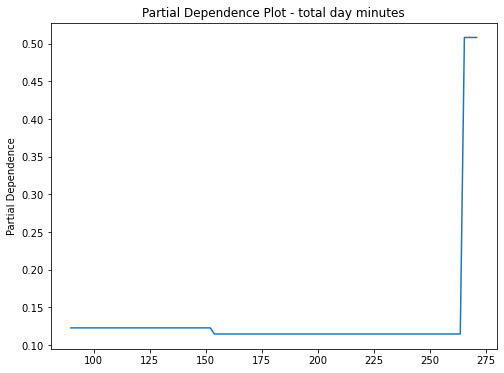

In [62]:
feature_names = ['total day minutes']
feature_idx = X_encoded.columns.get_loc('total day minutes')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - total day minutes')

plt.show()

# Customer Service Calls - Partial Dependance

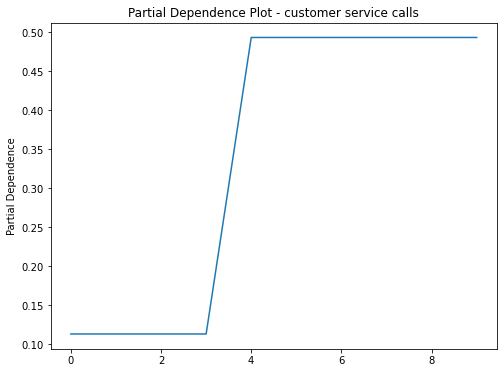

In [63]:
feature_names = ['customer service calls']
feature_idx = X_encoded.columns.get_loc('customer service calls')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - customer service calls')

plt.show()

# Total Day Charge - Partial Dependance

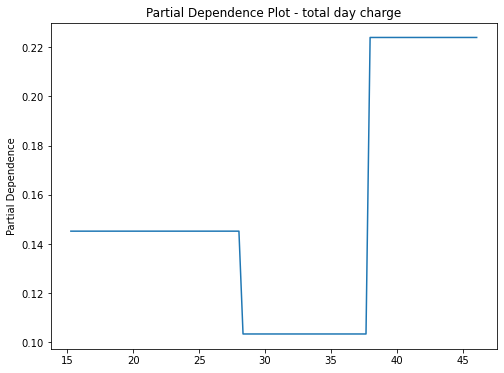

In [64]:
feature_names = ['total day charge']
feature_idx = X_encoded.columns.get_loc('total day charge')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - total day charge')

plt.show()

# international plan_yes - Partial Dependance

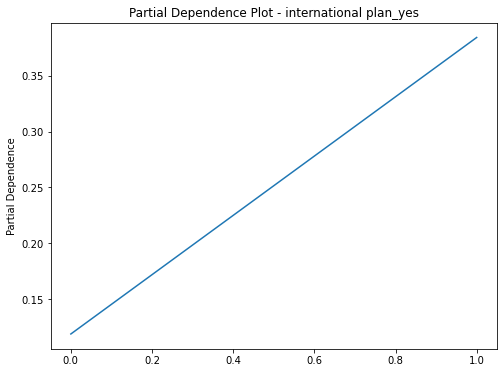

In [71]:
feature_names = ['international plan_yes']
feature_idx = X_encoded.columns.get_loc('international plan_yes')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - international plan_yes')

plt.show()

# Total Intl Calls - Partial Dependance

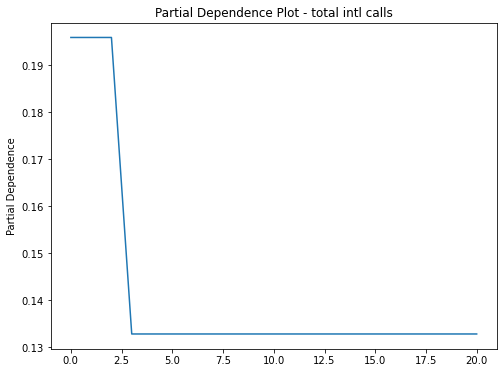

In [70]:
feature_names = ['total intl calls']
feature_idx = X_encoded.columns.get_loc('total intl calls')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - total intl calls')

plt.show()

# Total Eve Minutes - Partial Dependance

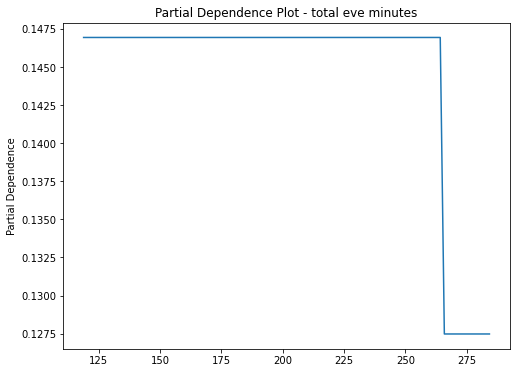

In [66]:
feature_names = ['total eve minutes']
feature_idx = X_encoded.columns.get_loc('total eve minutes')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - total eve minutes')

plt.show()

# Total Intl Charge - Partial Dependance

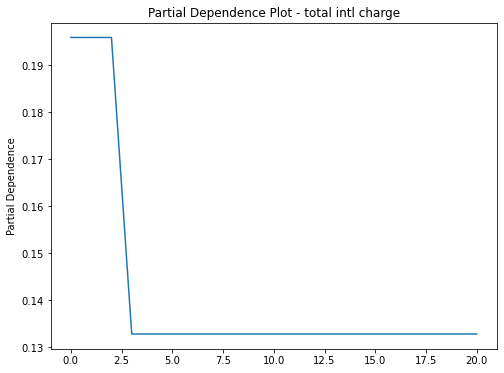

In [67]:
feature_names = ['total intl calls']
feature_idx = X_encoded.columns.get_loc('total intl calls')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - total intl charge')

plt.show()

# total day charge - Partial Dependance

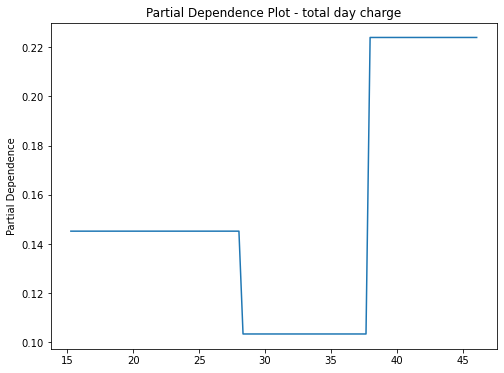

In [72]:
feature_names = ['total day charge']
feature_idx = X_encoded.columns.get_loc('total day charge')

pdp_values, axes = partial_dependence(best_model, X_encoded, features=[feature_idx], grid_resolution=100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(axes[0], pdp_values[0])

ax.set_ylabel('Partial Dependence')
ax.set_title('Partial Dependence Plot - total day charge')

plt.show()

In [73]:
Testing = data[['international plan', 'churn']]

In [74]:
# Calculate the churn and non-churn percentages for each category of 'international plan'
percentages = Testing.groupby('international plan')['churn'].value_counts(normalize=True) * 100

# Extract the churn percentages for each category
churn_percentages = percentages[:, True]

# Extract the non-churn percentages for each category
non_churn_percentages = percentages[:, False]

# Print the results
for category, churn_percentage, non_churn_percentage in zip(percentages.index.levels[0], churn_percentages, non_churn_percentages):
    print(f"international plan = {category}: churn % = {churn_percentage:.2f}%, non-churn % = {non_churn_percentage:.2f}%")

international plan = no: churn % = 11.50%, non-churn % = 88.50%
international plan = yes: churn % = 42.41%, non-churn % = 57.59%


In [19]:
# Access the feature importances from the model
importance_scores = best_model.feature_importances_

# Get the column names from X_encoded
column_names = X_encoded.columns

# Sort the column names and importance scores in descending order of importance
sorted_features = sorted(zip(column_names, importance_scores), key=lambda x: x[1], reverse=True)

# Print the sorted column names and their corresponding importance scores
for feature, importance in sorted_features:
    print(f"Feature: {feature}, Importance: {importance}")

Feature: total day minutes, Importance: 0.15992362100234925
Feature: customer service calls, Importance: 0.15276571947867512
Feature: total day charge, Importance: 0.14788619422558527
Feature: total intl calls, Importance: 0.12238463706359241
Feature: international plan_yes, Importance: 0.1202106493385481
Feature: total eve charge, Importance: 0.10869820113543217
Feature: total intl minutes, Importance: 0.08347336990731334
Feature: number vmail messages, Importance: 0.061461507980473826
Feature: total night charge, Importance: 0.018391337401972165
Feature: total eve minutes, Importance: 0.013004628108052183
Feature: total night calls, Importance: 0.0068569237942148475
Feature: total day calls, Importance: 0.00494321056379116
Feature: account length, Importance: 0.0
Feature: total eve calls, Importance: 0.0
Feature: total night minutes, Importance: 0.0
Feature: total intl charge, Importance: 0.0
Feature: state_AK, Importance: 0.0
Feature: state_AL, Importance: 0.0
Feature: state_AR, Imp

In [20]:
import statsmodels.api as sm

# Fit the logistic regression model
logistic_model = sm.Logit(y_train, X_train)
logistic_result = logistic_model.fit()

# Get the p-values
p_values = logistic_result.pvalues

# Create a DataFrame to store the feature names and p-values
p_values_table = pd.DataFrame({'Feature': X_train.columns, 'P-Value': p_values})

# Sort the DataFrame by p-values in ascending order
p_values_table = p_values_table.sort_values(by='P-Value',ascending=True)



Optimization terminated successfully.
         Current function value: 0.311392
         Iterations 8


In [21]:
p_values_table = p_values_table.sort_values(by='P-Value').reset_index(drop=True)

In [22]:
p_values_table.head(60)

,Feature,P-Value
0,international plan_yes,2.551573e-36
1,customer service calls,2.215095e-26
2,state_CO,1.697309e-17
3,state_AL,2.139845e-17
4,state_SD,2.428092e-17
5,state_WI,2.433393e-17
6,state_IL,3.585046e-17
7,state_VA,4.671522e-17
8,state_TN,4.677250e-17
9,state_WV,4.807087e-17


In [23]:
p_values_table.tail(60)

,Feature,P-Value
8,state_TN,4.677250e-17
9,state_WV,4.807087e-17
10,state_DE,5.094884e-17
11,state_WY,6.610192e-17
12,state_VT,6.760538e-17
13,state_NM,1.070624e-16
14,state_OH,1.355888e-16
15,state_AZ,3.233424e-16
16,state_FL,3.284292e-16
17,state_ND,3.997253e-16


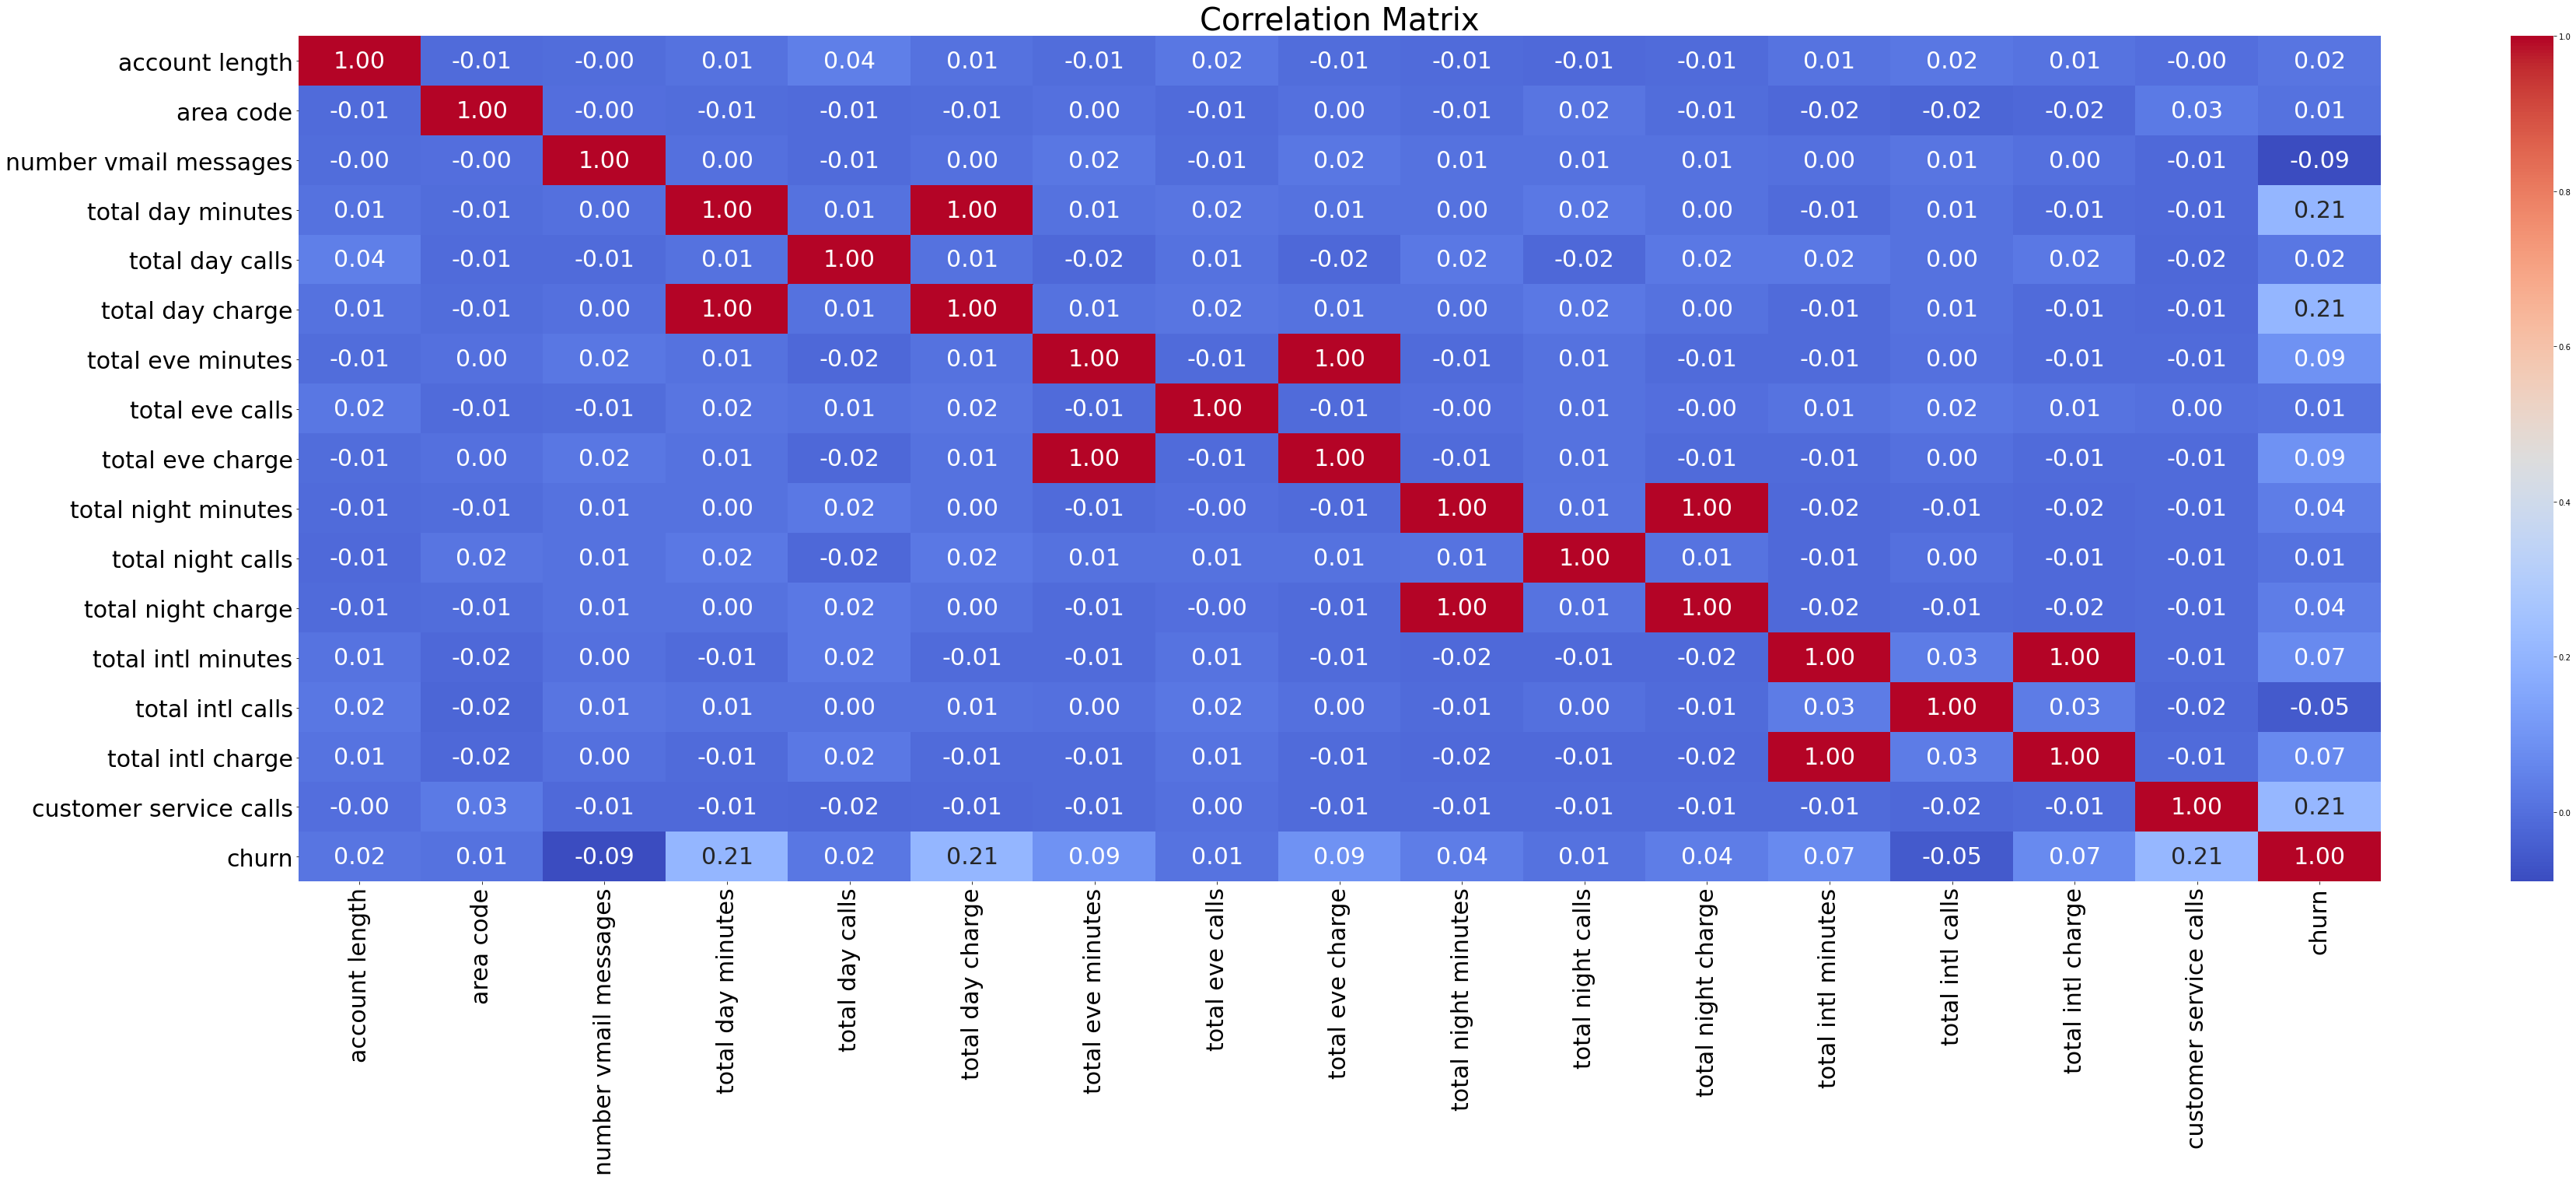

In [24]:
correlation_matrix = data.corr()

plt.figure(figsize=(60, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"fontsize": 30})
plt.title("Correlation Matrix", fontsize=40)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()